### Author: Tejaswini Raghavendra Kamath
### The Sparks Foundation: Data Science and Business Analytics (GRIP June '21)


### Task 2: Prediction using Unupervised ML model 

#### Problem Statement

Predict optimum number of clusters from given 'Iris' dataset.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
irisDf = pd.DataFrame(iris.data, columns = iris.feature_names)
irisDf.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
irisDf.shape

(150, 4)

In [4]:
irisDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


There is no missing data.

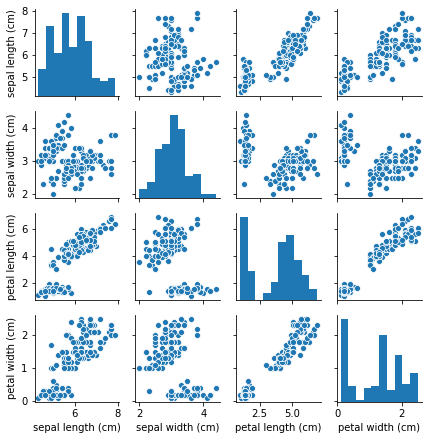

In [5]:
#Checking for correlation between different variables
sns.pairplot(irisDf,height=1.5);

There appears to be a positive linear relationship between:
- sepal length and petal length
- petal length and petal width

In [6]:
cols = irisDf.columns

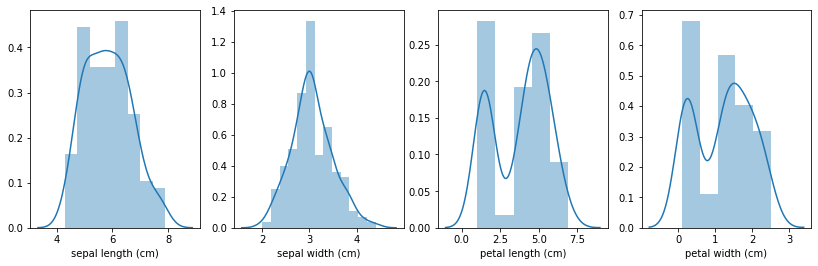

In [7]:
plt.figure(figsize=(14,4))

for i in range(1,len(cols)+1):
    plt.subplot(1,4,i)
    sns.distplot(irisDf[cols[i-1]])
#     plt.title(irisDf.columns[i-1])
    
plt.show()

Bimodal distribution as seen for petal length and petal width indicate higher chances of internal grouping.

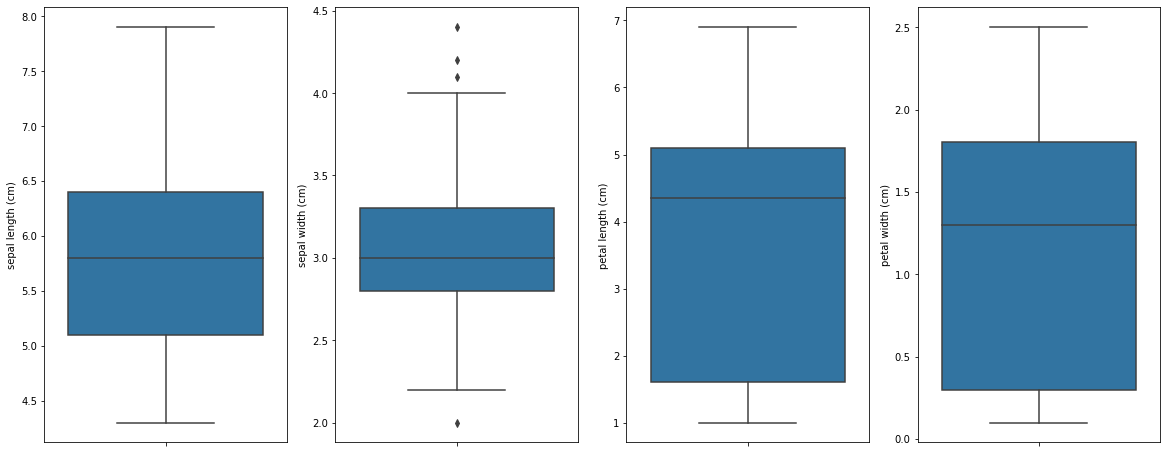

In [8]:
plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(1,len(cols)+1):
    plt.subplot(1,4,i)
    sns.boxplot(x=cols[i-1],data=irisDf,orient='v')
plt.show()

Soft capping sepal width due to presence of outliers i.e. capping between quantile (1% to 99%)

In [9]:
q1 = irisDf['sepal width (cm)'].quantile(0.01)
q2 = irisDf['sepal width (cm)'].quantile(0.99)

print(q1, q2)
irisDf['sepal width (cm)'][irisDf['sepal width (cm)']<=q1] = q1
irisDf['sepal width (cm)'][irisDf['sepal width (cm)']>=q2] = q2

2.2 4.150999999999999


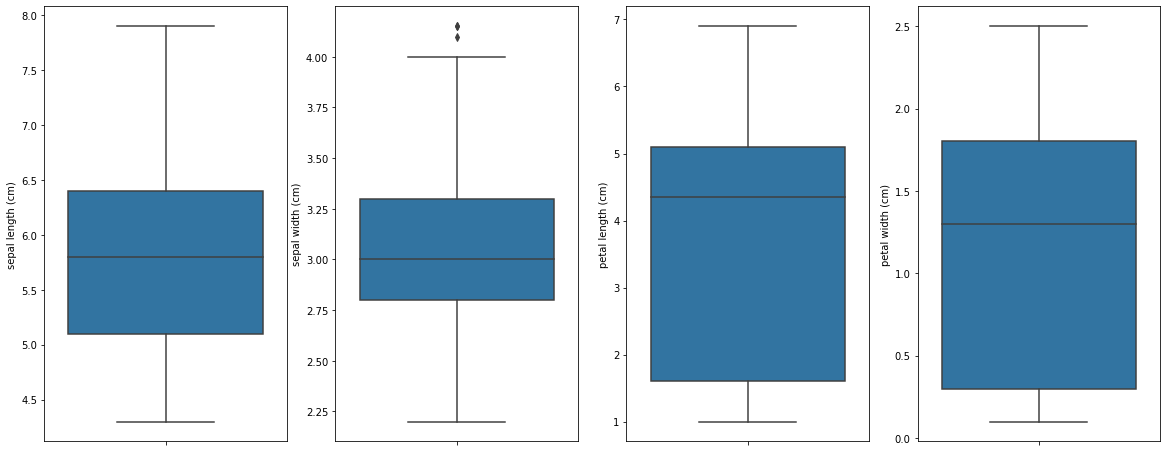

In [10]:
plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(1,len(cols)+1):
    plt.subplot(1,4,i)
    sns.boxplot(x=cols[i-1],data=irisDf,orient='v')
plt.show()

Hopkin's Statistic

Hopkins Statistic is used to check whether the data is indeed displays cluster tendency i.e. it can form distinct clusters.
Hopkins statistic indicates how different given data is from randomly scattered data. The more the dataset is different from uniformly distributed data,the better the candidate to perform clustering.
A score of 0 indicates a uniformly distributed data, 0.5 indicates random data distribution, 1 indicates cluster tendency. Hence, the closer the value to 1, higher the cluster tendency.


In [11]:
# Hopkins Statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np, pandas as pd
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [12]:
hopkins(irisDf)

0.8431413597374103

A score of 0.84 indicates a good cluster tendency. We can proceed with clustering

In [13]:
x = irisDf.iloc[:, [0, 1, 2, 3]].values

## Building a model using K-Means clustering

## Finding the Optimal Number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

### Sum of Square Distance (SSD) or Elbow Curve

Elbow method is one of the most popular method used to select the optimal number of clusters by fitting the model with a range of values for K in K-means algorithm. Elbow method requires drawing a line plot between SSE (Sum of Squared errors) vs number of clusters and finding the point representing the “elbow point” (the point after which the SSE or inertia starts decreasing in a linear fashion).

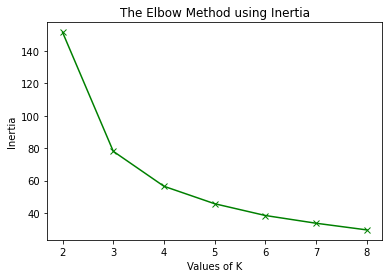

In [14]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(irisDf)
    ssd.append(kmeans.inertia_)    

plt.plot(range_n_clusters,ssd,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

As can be observed there is an elbow at 3. This indicates that k=3 is a good cluster number

### Silhouette Analysis
* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

For n_clusters=2, the silhouette score is 0.6816115549553682
For n_clusters=3, the silhouette score is 0.5537950897784162
For n_clusters=4, the silhouette score is 0.49932950761485095
For n_clusters=5, the silhouette score is 0.49005032921182534
For n_clusters=6, the silhouette score is 0.36686516230362815
For n_clusters=7, the silhouette score is 0.3585633426310045
For n_clusters=8, the silhouette score is 0.3537489541748728


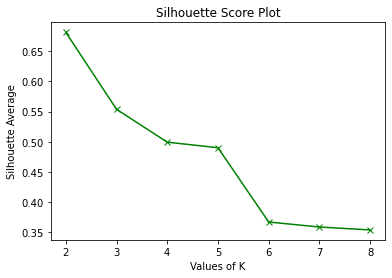

In [15]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
SilhouetteScore = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(irisDf)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(irisDf, cluster_labels)
    SilhouetteScore.append((num_clusters,silhouette_avg))
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
# print(SilhouetteScore)
clusterDF = pd.DataFrame(SilhouetteScore)

plt.plot(clusterDF[0],clusterDF[1], 'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Average') 
plt.title('Silhouette Score Plot');

As observed, the silhouette score is maximum at 3.

In both cluster number determination options, the observed k values show 3 as ideal. Hence, will run K-Means algorithm with k value as 3.


In [16]:
# Model with k=3
kmeans3 = KMeans(n_clusters=3, random_state=0, max_iter=500)
y_kmeans = kmeans3.fit(irisDf)

In [17]:
# assign the label
irisDf['cluster_id'] = kmeans3.labels_
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


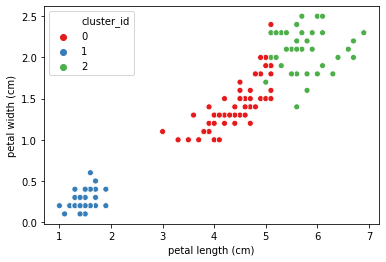

In [18]:
# Visualising the clusters - On the petal related columns
sns.scatterplot(x='petal length (cm)', y = 'petal width (cm)', hue = 'cluster_id', data = irisDf, palette='Set1')
plt.legend()
plt.show()

We can observe 3 almost distinct clusters  with a slight overlap between clusters 0 and 2.